In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# NOTE: raw txt file has emotion labels 1-indexed, I am shifting to zero-indexing
emotion_lookup = {
    0: "Surprise",
    1: "Fear",
    2: "Disgust",
    3: "Happiness",
    4: "Sadness",
    5: "Anger",
    6: "Neutral"
}
race_lookup = {
    0: "Caucasian",
    1: "African-American",
    2: "Asian",
}

In [3]:
# Construct dataframe for train/test data attributes
data_dir = Path("./data")
raf_dir = data_dir / "RAF"
train_dir = raf_dir / "aligned_train"
test_dir = raf_dir / "aligned_test"
annot_dir = raf_dir / "manual"
labels_file = raf_dir / "list_partition_label.txt"
df = pd.read_csv(labels_file, sep=" ", header=None)
df.columns = ["Name", "Emotion"]
df["Path"] = df["Name"].apply(lambda x: os.path.join(str(train_dir), x.replace(".jpg","_aligned.jpg")) if ("train" in x) else os.path.join(str(test_dir), x.replace(".jpg","_aligned.jpg")))
df["Split"] = df["Name"].apply(lambda x: "Train" if ("train" in x) else "Test")
gender = []
race = []
age = []
for i,r in df.iterrows():
    annot_file = os.path.join(str(annot_dir), "{}_manu_attri.txt".format(r["Name"].replace(".jpg","")))
    with open(annot_file, "r") as f:
        lines = f.readlines()
        gender.append(int(lines[5]))
        race.append(int(lines[6]))
        age.append(int(lines[7]))
df["Gender"] = gender
df["Race"] = race
df["Age"] = age
# NOTE: raw txt file has emotion labels 1-indexed, I am shifting to zero-indexing
df["Emotion"] = df["Emotion"] - 1
df["EmotionLabel"] = df["Emotion"].apply(lambda x: emotion_lookup[x])
df["RaceLabel"] = df["Race"].apply(lambda x: race_lookup[x])
df_train = df[df["Split"]=="Train"]
df_test = df[df["Split"]=="Test"]
assert len(df) == len(df_train) + len(df_test)

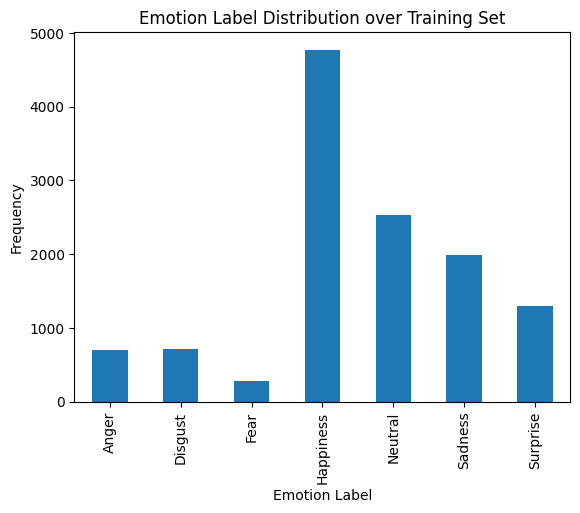

In [4]:
# Distribution of emotion labels
fig, ax = plt.subplots()
ax.set_title("Emotion Label Distribution over Training Set")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Frequency")
df_train["EmotionLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

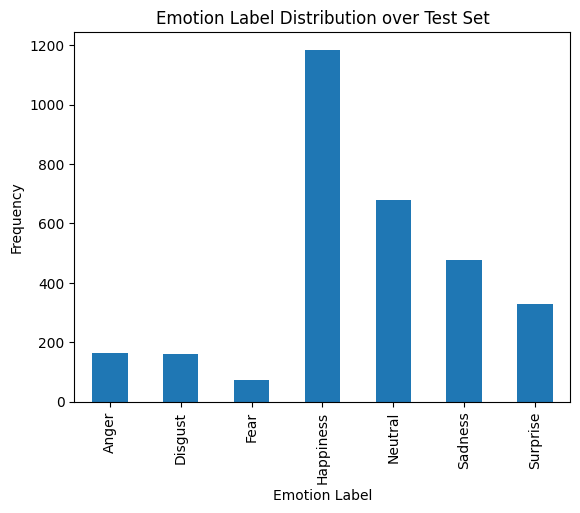

In [5]:
fig, ax = plt.subplots()
ax.set_title("Emotion Label Distribution over Test Set")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Frequency")
df_test["EmotionLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

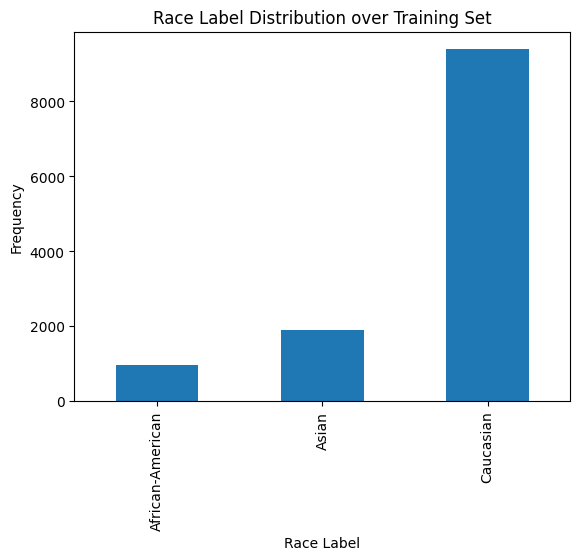

In [6]:
# Distribution of race labels
fig, ax = plt.subplots()
ax.set_title("Race Label Distribution over Training Set")
ax.set_xlabel("Race Label")
ax.set_ylabel("Frequency")
df_train["RaceLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

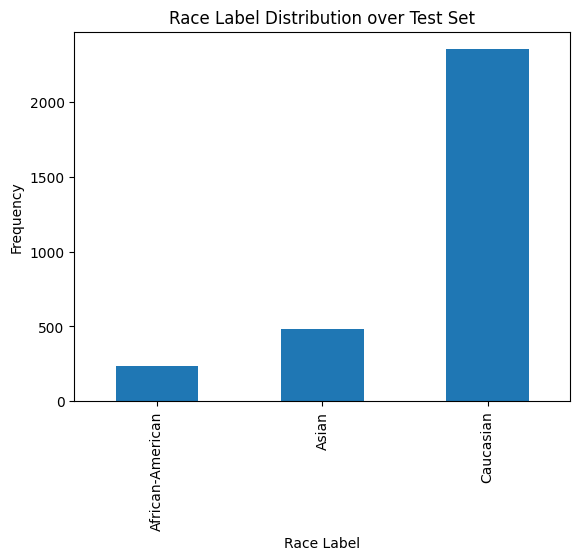

In [7]:
fig, ax = plt.subplots()
ax.set_title("Race Label Distribution over Test Set")
ax.set_xlabel("Race Label")
ax.set_ylabel("Frequency")
df_test["RaceLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

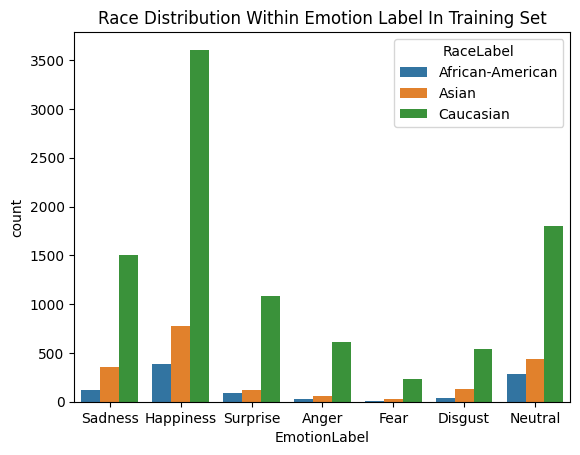

In [8]:
# Distribution of race within each emotion label
race_label_order = ["African-American", "Asian", "Caucasian"]
fig, ax = plt.subplots()
ax.set_title("Race Distribution Within Emotion Label In Training Set")
sns.countplot(data=df_train, x="EmotionLabel", hue="RaceLabel", hue_order=race_label_order, ax=ax)
plt.show()

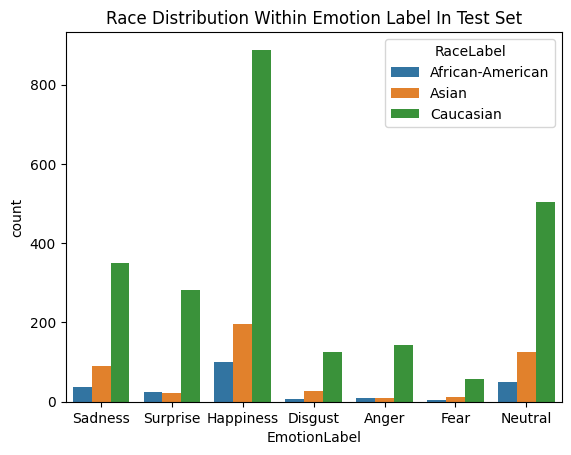

In [9]:
fig, ax = plt.subplots()
ax.set_title("Race Distribution Within Emotion Label In Test Set")
sns.countplot(data=df_test, x="EmotionLabel", hue="RaceLabel", hue_order=race_label_order, ax=ax)
plt.show()

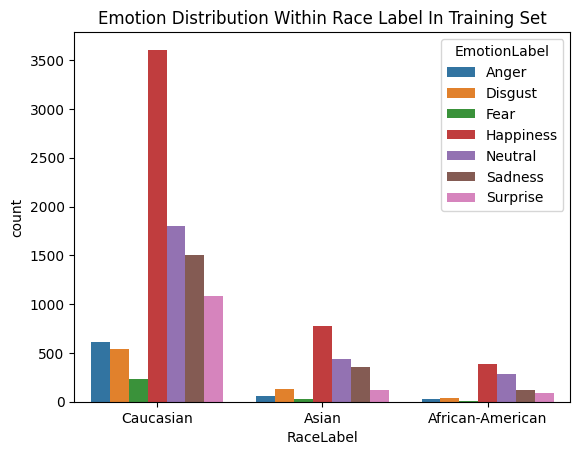

In [10]:
# Distribution of emotion within each race label
emotion_label_order = [emotion_lookup[i] for i in range(7)]
emotion_label_order.sort()
fig, ax = plt.subplots()
ax.set_title("Emotion Distribution Within Race Label In Training Set")
sns.countplot(data=df_train, x="RaceLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

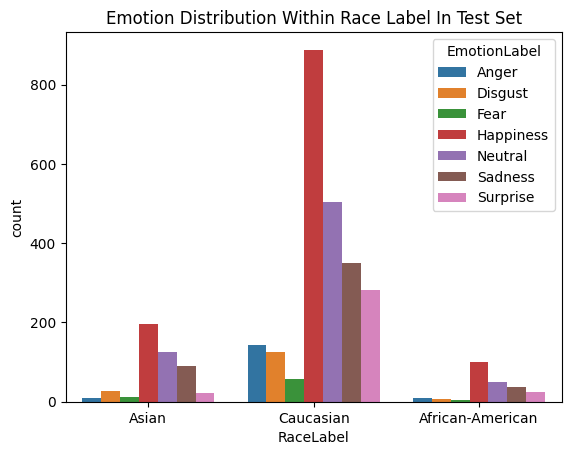

In [11]:
fig, ax = plt.subplots()
ax.set_title("Emotion Distribution Within Race Label In Test Set")
sns.countplot(data=df_test, x="RaceLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

In [12]:
df.head()

,Name,Emotion,Path,Split,Gender,Race,Age,EmotionLabel,RaceLabel
0,train_00001.jpg,4,data/RAF/aligned_train/train_00001_aligned.jpg,Train,1,0,2,Sadness,Caucasian
1,train_00002.jpg,4,data/RAF/aligned_train/train_00002_aligned.jpg,Train,1,0,2,Sadness,Caucasian
2,train_00003.jpg,3,data/RAF/aligned_train/train_00003_aligned.jpg,Train,1,2,2,Happiness,Asian
3,train_00004.jpg,3,data/RAF/aligned_train/train_00004_aligned.jpg,Train,1,0,2,Happiness,Caucasian
4,train_00005.jpg,4,data/RAF/aligned_train/train_00005_aligned.jpg,Train,1,2,1,Sadness,Asian


## Splits

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Validation split
df_train_sp, df_val_sp = train_test_split(df_train, test_size=0.2, random_state=5)

In [15]:
# Write to file
splits_dir = raf_dir / "splits"
os.makedirs(splits_dir, exist_ok=True)
df_train_sp.to_csv(os.path.join(str(splits_dir), "train_files.csv"))
df_val_sp.to_csv(os.path.join(str(splits_dir), "val_files.csv"))
df_test.to_csv(os.path.join(str(splits_dir), "test_files.csv"))
# original train
df_train.to_csv(os.path.join(str(splits_dir), "original_train_files.csv"))